## **Israel Elections Data - Lab 2**
1. Idan Keipour 315355537
2. Menachem Sokolik 314696972
3. Maria Mordvova 345232821


In [19]:
# Add a check if we run in google colab or locally in jupyter notebook
run_in_colab = False
if 'google.colab' in str(get_ipython()):
    run_in_colab = True
    print('Running on CoLab')
else:
    print('Running locally on Jupyter')



Running on CoLab


Show heatmap of the correlation matrix: 


In [20]:
# Import modules 
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
import statsmodels.api as sm  # a module for statistical modelling (e.g. regression analysis)
from matplotlib import pyplot as plt # a module for working with plots
import io


In [21]:
# Loading elections 2021 elections data:
if run_in_colab:
    from google.colab import files
    uploaded = files.upload()

Saving votes per ballot 2021.csv to votes per ballot 2021 (1).csv
Saving expc.csv to expc (2).csv
Saving votes per city 2021.csv to votes per city 2021 (2).csv


In [22]:
if   run_in_colab:
    df_2021_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
else:
  df_2021_raw = pd.read_csv(data_path + 'votes per city 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')  # need to read locally


if   run_in_colab:
    df_2021_ballots_raw = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
else:
  df_2021_ballots_raw = pd.read_csv(data_path + 'votes per ballot 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')  # need to read locally


In [23]:
# Mount drive in google colab
if run_in_colab:
    from google.colab import drive
    drive.mount('/content/drive')
else:  # Set local path 
    data_path = "C:/Users/menac/OneDrive/Desktop/52568 STATISTICS LAB/LAB2"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Create a dictionary mapping parties names to voting letters

In [24]:
parties_dict_2021 ={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה", 'ט'  : "הציונות הדתית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "כחול לבן", 'שס'  : "שס"}


In [25]:
df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2021
df_2021 = df_2021[df_2021.columns[5:-1]] # removing "metadata" columns

*Question 1*

*Calibration of an area so that the locality with the maximum number of "בזב" will have a value of 200.*

In [28]:
size = (df_2021_raw["בזב"]/max(df_2021_raw["בזב"]))*200

*Show scatter plot of party votes for two parties*

In [29]:
# Show party votes for two parties
def two_parties_scatter(df, party1, party2):
    votes_per_city = df.sum(axis=1)
    party_share1 = df[party1] / votes_per_city
    party_share2 = df[party2] / votes_per_city

    plt.scatter(party_share1, party_share2,s=size)  # Here draw circles with area proportional to city size
    plt.xlabel(parties_dict_2021[party1][::-1])
    plt.ylabel(parties_dict_2021[party2][::-1])
    plt.title('Scatter for two parties ' )
    plt.show()

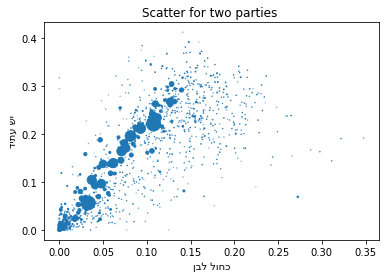

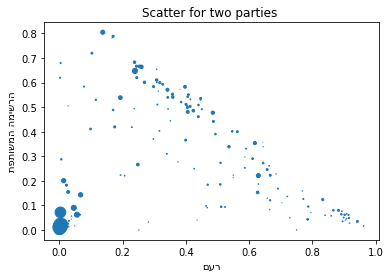

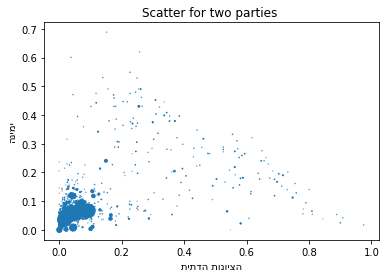

In [30]:
two_parties_scatter(df_2021, "כן", "פה")
two_parties_scatter(df_2021, "עם", "ודעם")
two_parties_scatter(df_2021, "ט", "ב")

ניתן לשים לב כי התרשים המתאר את הקורלציה בין המפלגות יש עתיד וכחול לבן, ניתן לראות כי המתאם הינו חיובי. ככול שמספר המצביעים עולה באחד גם כמות המצבעעים עולה בשני. 

בגרף השני, ניתן לשים לב כי המתאם בין השנים (רעם ורשימה משותפת) היונו שלילי בעיקרו. ככול שעולה באחד יורד בשני.

בגרף השלישי, ניתן לשים לב כי המתאם בין שני המפלגות (הציונות הדתית וימינה) בתחילה עולה אך לאחר מכן יורד.

הגרף הראשון הוא יחסית צפוי מאחר ואנו יודעים שמפלגת יש עתיד ומפלגת כחול לבן הן מפלגות דומות (ואף היו מפלגה מאוחדת בבחירות שקדמו לבחירות הללו). לכן המתאם ביניהם הוא חיובי.

הגרף השני הפתיע אותנו מכיוון שהיינו מצפים למתאם חיובי בין המפלגות הערביות. ניתן להסביר את המתאם השלילי בכך שהמפלגות מתחרות על אותן מצביעים באותם הישובים. כלומר, ככל הנראה ישנם יישובים בהם התושבים יצביעו או לרע"ם או לרשימה המשותפת (ומעט מאוד למפלגות אחרות) ולכן זה משתקף במתאם שלילי בין המפלגות.

בגרף השלישי נראה שמשמעות היא דומה לגרף השני אם כי בצורה פחות מובהקת.

*Question 2.1*

In [31]:
# Compute votes share only for parties above a certain threshold 
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]

# dataframe of parties that pass the votes rate
df_2021_parties_votes_pass = parties_votes_percents(df_2021,0.0325)
names = df_2021_parties_votes_pass.keys()

In [32]:
df_2021_new = df_2021[names] # Select the relevant columns.
df_2021_corr_mat = df_2021_new.corr(method='spearman') # The correlation between the  13 parties

In [33]:
# Display heatmap for a correlation matrix 
# Input: 
# corr_mat - matrix of correlations 
# names - vector with names for each row/column
def heatmap_corr(corr_mat, names):
    rev_names = [parties_dict_2021[name][::-1] for name in list(names)]
    fig, ax = plt.subplots()
    im = ax.imshow(corr_mat, cmap=plt.get_cmap('viridis'))
    n = corr_mat.shape[0]  # get number of variables 
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    ax.set_xticklabels(rev_names, rotation=-90 )
    ax.set_yticklabels(rev_names)
    ax.set_title("Parties pairwise correlations")
    
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax) #  **cbar_kw)
    cbar.ax.set_ylabel('votes correlation', rotation=-90, va="bottom")    

Show heatmap of the correlation matrix:

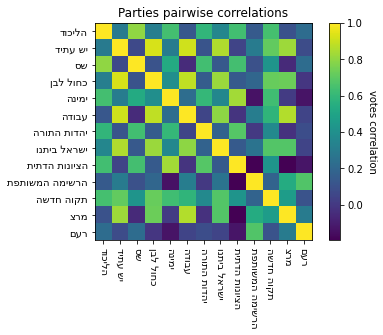

In [34]:
heatmap_corr(df_2021_corr_mat,names)

*Question 2.2*

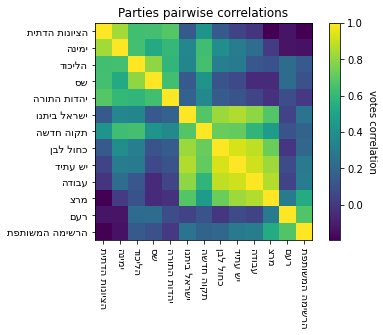

In [35]:
names_new = list(['ודעם', 'עם', 'מרצ','אמת','פה','כן','ת','ל','ג','שס','מחל','ב','ט'])
df_2021_new_2 = df_2021[names_new[::-1]] # Select the relevant columns.
df_2021_corr_mat_new = df_2021_new_2.corr(method='spearman') # The correlation between the 13 parties
heatmap_corr(df_2021_corr_mat_new,names_new[::-1])

לאחר סידור מחדש על פי שייכות במפה הפוליטית מבחינת אידיולוגית המפלגות, כעת ניתן לראות בבירות כי קיימת מתאם הגדול מאפס בין מפלגות הקרובות להם מבחינה דיאולוגית, דהיינו אילו בישוב מסוים הצביעו לימינה יות אזי הצביעו פחות למפלגת הציונת הדתית דבר זהה יש עתיד וכחול לבן או עבודה.

ניתן לראות כי נוצרו שלושה חלוקות בהם הקורלציה גבהה בין המפלגות.
כפי המוצגת במוחש במציאות, ישנן מפלגות ערביות אשר מתחרות בינן לבין עצמם, יש את המפלגות הימניות ואת המפלגות הנמצאות בשמואל במפה הפוליטית.


*Question 3.1*

In [36]:
cities_legal_votes = pd.DataFrame()
cities_have_the_right_to_vote = pd.DataFrame()

# Calculation of the distribution of vote each city. 
# The fraction of votes for party
for i in list(df_2021.columns):
    cities_legal_votes[i] = df_2021[i].div(df_2021_raw['כשרים'])
    cities_have_the_right_to_vote[i] = (cities_legal_votes.loc[:,i])*(df_2021_raw['בזב'])

# sum of values
cities_have_the_right_to_vote_sum = cities_have_the_right_to_vote.sum()
national_sum = df_2021.sum()

result = pd.concat([cities_have_the_right_to_vote_sum, national_sum], axis=1,keys=["Estimate Votes", "Real Votes"]).transpose()

*function form ex1*

In [37]:
# Bar plot for a party, only showing values above a certain threshold
def party_bar(df, thresh, total, fraction):
    width = 0.3  # set column width 
    votes = parties_votes_percents(df, thresh)  # total votes for each party
    n = len(votes)  # number of parties
    names = votes.keys()

    rev_names = [parties_dict_2021[name][::-1] for name in list(names)]
    fig, ax = plt.subplots()  # plt.subplots()

    total_votes = df.loc[total,names]/df.loc[total,names].sum()
    fraction_votes = df.loc[fraction,names]/df.loc[fraction,names].sum()
    total_bar = ax.bar(np.arange(n), list(total_votes), width, color='g')
    fraction_bar = ax.bar(np.arange(n)+width, list(fraction_votes), width, color='b')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('total Votes percent vs fraction Votes percent per party 2021')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names, rotation=-90)
    ax.legend((total_bar[0] , fraction_bar[0]), (total[::], fraction[::]))
    plt.show()

    return fig, ax  

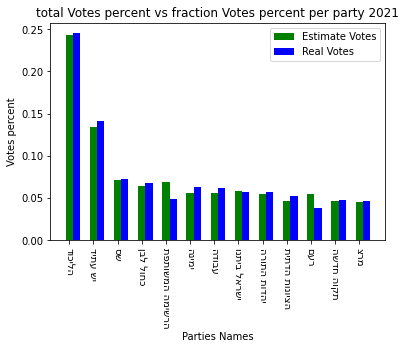

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faa17e10fd0>)

In [39]:
party_bar(result, 0.0325, 'Estimate Votes', 'Real Votes')

*Question 3.2*

In [40]:
df_2021_ballots = df_2021_ballots_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2021
df_2021_ballots = df_2021_ballots[df_2021_ballots.columns[9:-1]] # removing "metadata" columns

In [41]:
cities_legal_votes_ballots = pd.DataFrame()
cities_have_the_right_to_vote_ballots = pd.DataFrame()

# Calculation of the distribution of vote each city. 
# The fraction of votes for party
for i in list(df_2021_ballots.columns):
    cities_legal_votes_ballots[i] = df_2021_ballots[i].div(df_2021_ballots_raw['כשרים'])
    cities_have_the_right_to_vote_ballots[i] = (cities_legal_votes_ballots.loc[:,i])*(df_2021_ballots_raw['בזב'])

# sum of values
cities_have_the_right_to_vote_ballots_sum = cities_have_the_right_to_vote_ballots.sum()
national_ballots_sum = df_2021_ballots.sum()

result_ballots = pd.concat([cities_have_the_right_to_vote_ballots_sum, national_ballots_sum], axis=1,keys=["Estimate Votes", "Real Votes"]).transpose()


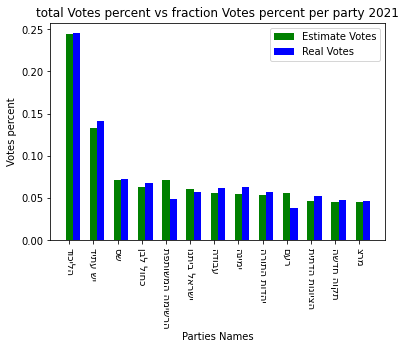

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faa17d83bd0>)

In [42]:
party_bar(result_ballots, 0.0325, 'Estimate Votes', 'Real Votes')

ניתן להבחין כי התוצאות מעט שונות ממה שהצביעו בפועל, קל לשים לב כי המפלגות הערביות בהתפלגות המעורכת זוכות ליותר היות ותמיד אחוז הצבעה בישובים הערבים נמוכים יותר מאחוז הצבעה בישובים היהודים, כ"כ תמיד לרוב ההצבעה היא חד גוונית למלפגות הערביות.

ההבדל בין שני הגרפים הינו כי הגרף השני נעשה ע"י הקלפיות וכי מדוייק יותר וקרוב יותר לאילו היו כולם מצביעים.